In [7]:
import matplotlib.pyplot as plt
import numpy as np
from brycegp.model import SymbolicRegressor
from sklearn.metrics import mean_squared_error

In [2]:
X = np.linspace(-np.pi, np.pi, 20).reshape(-1, 1)
y = np.sin(X)

In [3]:
model = SymbolicRegressor(
    num_generations=10,
    num_cascades=5,
    population_size=100,
    max_complexity=400,
    archive_tournament_size=3,
    population_tournament_size=5
)

In [4]:
results = model.fit(X, y)

beginning cascade 1


100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


beginning cascade 2


100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


beginning cascade 3


100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


beginning cascade 4


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


beginning cascade 5


100%|██████████| 10/10 [00:14<00:00,  1.40s/it]


1734
(div (mul X0 (sub X0 9.42)) (mul (mul 2.36 9.97) (mul (mul X0 X0) (sub -9.93 6.69))))

(sub X0 X0)

(div 1.73 -8.72)

(div (sub X0 X0) X0)

(div X0 (div X0 -0.21))

(mul (div (sub X0 X0) (mul -4.76 3.17)) (div X0 (mul X0 -9.99)))

(mul X0 0.61)

(div (sub (sub X0 X0) X0) (add (mul 3.98 X0) X0))

(mul (div (add 9.34 -2.13) (div (div -3.48 2.86) -9.69)) (div 0.04 5.76))

(div (add (div 2.47 -7.53) (sub X0 X0)) (mul (sub (div 5.56 X0) X0) (sub X0 (sub X0 X0))))

(sub X0 -1.01)

(div X0 (add -6.67 -1.54))

(div (div 3.44 -1.74) (div (mul 4.28 X0) X0))

(mul (div (add 9.34 -2.13) (div (div -3.48 X0) -9.69)) (div 0.04 5.76))

(sub X0 X0)

(sub (add X0 (mul 0.23 X0)) (sub (add X0 (div (sub X0 X0) (mul -4.76 3.17))) (div (sub X0 X0) (sub 7.25 7.20))))

(sub X0 X0)

(sub X0 X0)

(div X0 (add X0 9.00))

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.98)

(div X0 3.

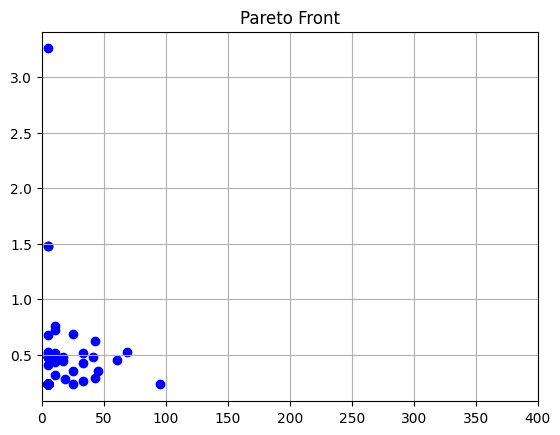

In [8]:
# Pareto Front
plt.title("Pareto Front")

print(len(results))
for individual in results:
    print(individual)
    complexity = individual.complexity()
    error = mean_squared_error(individual(X), y)
    print()
    plt.scatter(x=complexity, y=error, color='blue')
plt.grid()

plt.xlim(0, 400)
plt.show()

(div X0 3.98)


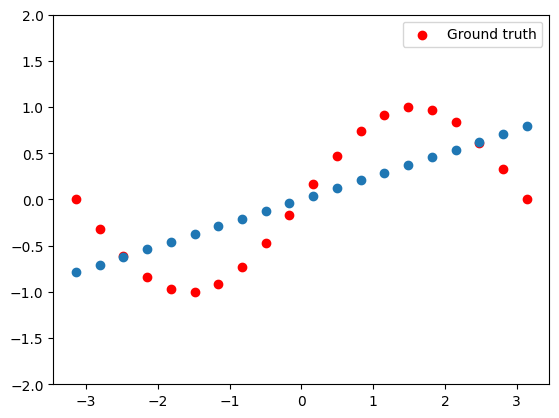

In [10]:
# Ground-truth function
plt.scatter(X, y, color='red', label='Ground truth')

# Sort programs by error
for solution in sorted(results, key=lambda program: mean_squared_error(program(X), y), reverse=False)[0:1]:
    print(solution)
    plt.scatter(X, solution(X))

plt.legend()
plt.ylim(-2, 2)
plt.show()